In [2]:

# from rl import (
#     DQN, ReplayMemory, Transition, DraftEnv,
#     NUM_MGRS, NUM_DRAFT_ROUNDS, ACTION_SPACE_DIM, 
#     STATE_SPACE_DIM, STARTER_COMPOSITION
#     )
import numpy as np
from rl_env import (
    DraftEnv,
    NUM_MGRS, NUM_DRAFT_ROUNDS, ACTION_SPACE_DIM, 
    STATE_SPACE_DIM, STARTER_COMPOSITION
    )
import pandas as pd

In [3]:
df_sleeper = pd.read_csv("data/sleeper/all_players.csv")
df_qb_proj = pd.read_csv("data/projections/QB_projections.csv")
df_rb_proj = pd.read_csv("data/projections/RB_projections.csv")
df_wr_proj = pd.read_csv("data/projections/WR_projections.csv")
df_te_proj = pd.read_csv("data/projections/TE_projections.csv")
df_k_proj = pd.read_csv("data/projections/K_projections.csv")
df_def_proj = pd.read_csv("data/projections/DEF_projections.csv")



df_qb_proj = df_qb_proj.loc[:, ["sleeper_id", "full_name", "team", "position", "source", "fpts"]].sort_values(by="fpts", ascending=False)
df_rb_proj = df_rb_proj.loc[:, ["sleeper_id", "full_name", "team", "position", "source", "fpts"]].sort_values(by="fpts", ascending=False)
df_wr_proj = df_wr_proj.loc[:, ["sleeper_id", "full_name", "team", "position", "source", "fpts"]].sort_values(by="fpts", ascending=False)
df_te_proj = df_te_proj.loc[:, ["sleeper_id", "full_name", "team", "position", "source", "fpts"]].sort_values(by="fpts", ascending=False)
df_k_proj = df_k_proj.loc[:, ["sleeper_id", "full_name", "team", "position", "source", "fpts"]].sort_values(by="fpts", ascending=False)
df_def_proj = df_def_proj.loc[:, ["sleeper_id", "full_name", "team", "position", "source", "fpts"]].sort_values(by="fpts", ascending=False)

df_proj = pd.concat([df_qb_proj, df_rb_proj, df_wr_proj, df_te_proj, df_k_proj, df_def_proj])
df_proj.columns

df_proj_agg = df_proj.groupby('sleeper_id')['fpts'].agg(['mean', 'std']).reset_index()
df_proj_agg['sleeper_id'] = df_proj_agg['sleeper_id'].astype(str)


df_players = df_proj_agg.merge(df_sleeper.loc[:, ['sleeper_id', 'full_name', 'position', 'team']], 
                                on='sleeper_id', 
                                how='left')

# filter df_players for the row where full_name contains hollywood
# df_players[df_players['full_name'].str.contains("Hollywood")]
df_players['mean'].max()
# df_players.dropna().shape


391.90771976233333

# Trim or pad

In [4]:
env = DraftEnv(df_players)
print(env.trim_or_pad(np.ones(10), 10))
print(env.trim_or_pad(np.ones(10), 12))
print(env.trim_or_pad(np.ones(10), 5))
print(env.trim_or_pad(np.ones(0), 5))
print(env.trim_or_pad(np.array([1,1,np.nan, 1]), 5))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
[1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0.]
[ 1.  1. nan  1.  0.]


# XXX

In [5]:
env = DraftEnv()
# Build roster
for i in range(NUM_MGRS):
    env.step(0)
for i in range(NUM_MGRS):
    env.step(1)
for i in range(NUM_MGRS):
    env.step(1)
for i in range(NUM_MGRS):
    env.step(1)
for i in range(NUM_MGRS):
    env.step(2)
for i in range(NUM_MGRS):
    env.step(2)
for i in range(NUM_MGRS):
    env.step(2)
for i in range(NUM_MGRS):
    env.step(3)
for i in range(NUM_MGRS):
    env.step(4)
for i in range(NUM_MGRS):
    env.step(5)
env.get_mgr_draft(1)

TypeError: __init__() missing 1 required positional argument: 'stochastic_temp'

In [ ]:
state, reward, terminated, _ = env.step(0)
print(state)

[0.73681083 0.73668883 0.730014   0.71182831 0.69467898 0.69217152
 0.64981539 0.600666   0.59711941 0.58709929 0.35690799 0.34120433
 0.33310988 0.30646279 0.29837339 0.2956327  0.2884408  0.28545627
 0.28456736 0.2840078  0.45781317 0.45700056 0.44095956 0.4353112
 0.38876298 0.38671484 0.38651178 0.38306938 0.38110999 0.37892368
 0.33706322 0.33458959 0.32777857 0.32252798 0.2797221  0.27168479
 0.26745287 0.26633941 0.25750435 0.25250722 0.33674729 0.3366059
 0.3352649  0.33281424 0.32661904 0.32530373 0.31604949 0.31236065
 0.31181653 0.31068546 0.36740755 0.36562481 0.36313556 0.36293337
 0.36259918 0.35180257 0.35107489 0.34929621 0.34718188 0.34617291
 0.         0.47826087 1.         3.         3.         1.
 1.         1.         1.         3.         3.         1.
 1.         1.         1.         3.         3.         1.
 1.         1.         1.         3.         3.         1.
 1.         1.         1.         3.         3.         1.
 1.         1.         1.         3. 

# Reasonable options

In [ ]:
env = DraftEnv(df_players)
env.reset()
# Build roster
for i in range(NUM_MGRS*15-1):
    env.step(env.reasonable_option())
    
# env.get_mgr_draft(5)
# env.get_needed_pos_counts(5)

for i in range(NUM_MGRS):
    env.get_team_comp(i)
    assert env.get_team_comp(i, flex=True)['QB'] >= STARTER_COMPOSITION['QB'], print(f'{i}: {env.get_team_comp(i, flex=True)}')
    assert env.get_team_comp(i, flex=True)['RB'] >= STARTER_COMPOSITION['RB'], print(f'{i}: {env.get_team_comp(i, flex=True)}')
    assert env.get_team_comp(i, flex=True)['WR'] >= STARTER_COMPOSITION['WR'], print(f'{i}: {env.get_team_comp(i, flex=True)}')
    assert env.get_team_comp(i, flex=True)['TE'] >= STARTER_COMPOSITION['TE'], print(f'{i}: {env.get_team_comp(i, flex=True)}')
    assert env.get_team_comp(i, flex=True)['K'] >= STARTER_COMPOSITION['K'], print(f'{i}: {env.get_team_comp(i, flex=True)}')
    assert env.get_team_comp(i, flex=True)['DEF'] >= STARTER_COMPOSITION['DEF'], print(f'{i}: {env.get_team_comp(i, flex=True)}')
    assert env.get_team_comp(i, flex=True)['FLEX'] >= STARTER_COMPOSITION['FLEX'], print(f'{i}: {env.get_team_comp(i, flex=True)}')

In [ ]:
env = DraftEnv(df_players)
env.reset()
# Build roster
for i in range(NUM_MGRS*15-1):
    env.step(env.reasonable_option())

pd.set_option('display.max_rows', None)
env.draft

,round,mgr,sleeper_id,full_name,team,position,team_pos,fp_mean,fp_std
0,0,0,4984,Josh Allen,BUF,QB,QB,1.0,51.322362
1,0,1,6904,Jalen Hurts,PHI,QB,QB,0.984445,45.210711
2,0,2,4046,Patrick Mahomes,KC,QB,QB,0.927424,40.843103
3,0,3,4881,Lamar Jackson,BAL,QB,QB,0.90366,34.622554
4,0,4,4034,Christian McCaffrey,SF,RB,RB,0.862532,25.370947
5,0,5,9229,Anthony Richardson,IND,QB,QB,0.858637,40.314449
6,0,6,9758,C.J. Stroud,HOU,QB,QB,0.85301,36.850537
7,0,7,6770,Joe Burrow,CIN,QB,QB,0.852806,38.517481
8,0,8,3294,Dak Prescott,DAL,QB,QB,0.852358,36.448834
9,0,9,6804,Jordan Love,GB,QB,QB,0.834496,50.539756


# Get mgr team comp

In [ ]:
print(env.get_team_comp(0))
env.get_mgr_draft(0)
env.calc_reward(0)


{'DEF': 3, 'FLEX': 4, 'K': 1, 'QB': 2, 'RB': 2, 'TE': 1, 'WR': 2}


,round,mgr,sleeper_id,full_name,team,position,team_pos,fp_mean,fp_std
0,0,0,4984,Josh Allen,BUF,QB,QB,1.0,51.322362
23,1,0,9493,Puka Nacua,LAR,WR,WR,0.644124,34.027194
24,2,0,8150,Kyren Williams,LAR,RB,RB,0.625078,13.991141
47,3,0,4983,DJ Moore,CHI,WR,WR,0.543606,28.373901
48,4,0,1466,Travis Kelce,KC,TE,TE,0.516778,26.221593
71,5,0,5892,David Montgomery,DET,RB,RB,0.469393,22.297827
72,6,0,8137,George Pickens,PIT,WR,FLEX,0.518203,28.105628
95,7,0,5967,Tony Pollard,TEN,RB,FLEX,0.441617,20.880981
96,8,0,NYJ,New York Jets,NYJ,DEF,DEF,0.410554,45.05841
119,9,0,1266,Greg Zuerlein,NYJ,K,K,0.337621,7.435349


In [ ]:
env.calc_reward(0)

np.float64(0.5173829454252288)

In [ ]:
(1 + 0.644124 + 0.625078 + 0.543606 + 0.516778 + 0.469393 + 0.518203 + 0.441617 + 0.410554 + 0.337621 + 0.787189 + 0.386715 + 0.386512 + 0.347182 + 0.346173)/15


0.517383

# Stochastic choice

In [7]:
from rl_env_sarl import SARLDraftEnv
import pandas as pd
env = SARLDraftEnv(stochastic_temp=1)
env.reset()
pd.set_option('display.max_rows', None)

state, reward, terminated, truncated, info = env.step(0) # 1
state, reward, terminated, truncated, info = env.step(1) # 2
state, reward, terminated, truncated, info = env.step(1) # 3
state, reward, terminated, truncated, info = env.step(1) # 4
state, reward, terminated, truncated, info = env.step(2) # 5
state, reward, terminated, truncated, info = env.step(2) # 6
state, reward, terminated, truncated, info = env.step(2) # 7
state, reward, terminated, truncated, info = env.step(3) # 8
state, reward, terminated, truncated, info = env.step(4) # 9
state, reward, terminated, truncated, info = env.step(5) # 10
state, reward, terminated, truncated, info = env.step(2) # 11
state, reward, terminated, truncated, info = env.step(3) # 12
state, reward, terminated, truncated, info = env.step(4) # 13
state, reward, terminated, truncated, info = env.step(3) # 14
state, reward, terminated, truncated, info = env.step(2) # 15

# [env.stochastic_choice(1)]


env.get_mgr_draft(0)

,round,mgr,sleeper_id,full_name,team,position,team_pos,fp_mean,fp_std
0,0,0,6904,Jalen Hurts,PHI,QB,QB,0.977959,45.742293
23,1,0,8146,Garrett Wilson,NYJ,WR,WR,0.603367,45.919996
35,2,0,2133,Davante Adams,LV,WR,WR,0.564132,34.206362
36,3,0,4018,Joe Mixon,HOU,RB,RB,0.544287,9.673359
59,4,0,5892,David Montgomery,DET,RB,RB,0.4682,23.055671
60,5,0,8146,Garrett Wilson,NYJ,WR,WR,0.603367,45.919996
83,6,0,6826,Cole Kmet,CHI,TE,TE,0.303522,34.82069
84,7,0,5937,Diontae Johnson,CAR,WR,FLEX,0.458495,25.445805
107,8,0,BUF,Buffalo Bills,BUF,DEF,DEF,0.434005,61.290644
108,9,0,11624,Xavier Worthy,KC,WR,FLEX,0.410295,37.361634


# Compute reward

In [ ]:
env.calc_reward(0)

np.float64(0.3671315714253468)

{'QB': 1, 'RB': 2, 'WR': 2, 'TE': 1, 'K': 1, 'DEF': 1, 'FLEX': 2}

In [ ]:

pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Automatically adjust the display width
pd.set_option('display.max_colwidth', None)  # Show full content of each column

display(env.draft)
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
pd.reset_option('display.width')
pd.reset_option('display.max_colwidth')


,round,mgr,sleeper_id,full_name,team,position,fp_mean,fp_std
0,0,0,4984,Josh Allen,BUF,QB,1.0,51.322362
1,0,1,6904,Jalen Hurts,PHI,QB,0.984445,45.210711
2,0,2,4046,Patrick Mahomes,KC,QB,0.927424,40.843103
3,0,3,4881,Lamar Jackson,BAL,QB,0.90366,34.622554
4,0,4,9229,Anthony Richardson,IND,QB,0.858637,40.314449
5,0,5,9758,C.J. Stroud,HOU,QB,0.85301,36.850537
6,0,6,6770,Joe Burrow,CIN,QB,0.852806,38.517481
7,0,7,3294,Dak Prescott,DAL,QB,0.852358,36.448834
8,0,8,6804,Jordan Love,GB,QB,0.834496,50.539756
9,0,9,5849,Kyler Murray,ARI,QB,0.821469,37.12343


In [ ]:
print(f"Manager 0 reward: {env.calc_reward(0)}")

Manager 0 reward: 2120.8903342432495


# N turns until next pick

In [ ]:
import math

EPS_START = 0.9
EPS_END = 0.05
EPS_DECAY = 10
steps_done = 100
EPS_END + (EPS_START - EPS_END) * math.exp(-1. * steps_done / EPS_DECAY)


0.05003858994029811

# Update state

In [ ]:
env = DraftEnv(df_players)
for i in range(15*5):
    env.step(env.reasonable_option())

team_comps = []
for i in range(NUM_MGRS):
    team_comps += [env.get_team_comp(i, flex=False)]
    
# print(team_comps)
print(env.get_state())
y = env.open_players.loc[env.open_players['position'] == 'RB'].sort_values(by='mean', ascending=False)
print(y.iloc[:10]['mean'])
# for i in range(NUM_MGRS):
    # x = env.get_team_comp(i, flex=False)
    # print(f'Manager {i} team composition:')
    # [print(k, ": ", x[k]) for k in ['QB', 'RB', 'WR', 'TE', 'K', 'DEF']]

[0.78718921 0.7783249  0.77506066 0.76524736 0.76385978 0.7487482
 0.74200571 0.73681083 0.73668883 0.730014   0.71182831 0.69467898
 0.69217152 0.64981539 0.600666   0.45085359 0.45036492 0.44624818
 0.44161673 0.43645091 0.43193225 0.42512635 0.4241969  0.41233265
 0.4010303  0.39583232 0.38281128 0.35690799 0.34120433 0.33310988
 0.30646279 0.29837339 0.2956327  0.2884408  0.28545627 0.28456736
 0.2840078  0.27891591 0.26241453 0.24762634 0.23274342 0.2094621
 0.19878679 0.19689002 0.19102851 0.50904608 0.49761237 0.49632618
 0.491771   0.48512525 0.48001218 0.47902271 0.46922753 0.46214694
 0.46060165 0.45781317 0.45700056 0.44095956 0.4353112  0.38876298
 0.38671484 0.38651178 0.38306938 0.38110999 0.37892368 0.3771289
 0.3660522  0.36592735 0.35647801 0.35607368 0.35464785 0.35424959
 0.35265442 0.34104422 0.33216643 0.39487087 0.36699873 0.3388359
 0.33706322 0.33458959 0.32777857 0.32252798 0.2797221  0.27168479
 0.26745287 0.26633941 0.25750435 0.25250722 0.23918895 0.22965989

In [ ]:
env.n_turns_until_next_pick()*23

np.float64(17.0)

# Get manager team composition

In [ ]:
# BATCH_SIZE is the number of transitions sampled from the replay buffer
# GAMMA is the discount factor as mentioned in the previous section
# EPS_START is the starting value of epsilon
# EPS_END is the final value of epsilon
# EPS_DECAY controls the rate of exponential decay of epsilon, higher means a slower decay
# TAU is the update rate of the target network
# LR is the learning rate of the ``AdamW`` optimizer
BATCH_SIZE = 128
GAMMA = 0.99
EPS_START = 0.9
EPS_END = 0.05
EPS_DECAY = 100000
TAU = 0.005
LR = 1e-4

env = DraftEnv(df_players)

# Get number of actions from gym action space
n_actions = env.action_space.n
# Get the number of state observations
state, info = env.reset()
n_observations = len(state)

mgr_networks = {i: {} for i in range(NUM_MGRS)}
for mgr in mgr_networks.values():
    mgr["policy"] = DQN(n_observations, n_actions).to(device)
    mgr["target"] = DQN(n_observations, n_actions).to(device)
    mgr["optimizer"] = optim.AdamW(mgr["policy"].parameters(), lr=LR, amsgrad=True)
    mgr["memory"] = ReplayMemory(100)
    mgr["target"].load_state_dict(mgr["policy"].state_dict())

steps_done = 0



# Make turns list

# Get state

# calc reward

In [ ]:
env = DraftEnv(df_players)
rewards = []
for i in range((15*12)-1):
    observation, reward, terminated, info = env.step(env.reasonable_option())
    if i % 15 == 0:
        rewards.append(reward)

In [ ]:
np.mean(rewards)

0.17634272551729524

In [ ]:
from dqn import DQN, ReplayMemory, Transition, STATE_SPACE_DIM, ACTION_SPACE_DIM


# count parameters
print(sum(p.numel() for p in DQN(STATE_SPACE_DIM, ACTION_SPACE_DIM, 32, 2).parameters() if p.requires_grad),
sum(p.numel() for p in DQN(STATE_SPACE_DIM, ACTION_SPACE_DIM, 64, 2).parameters() if p.requires_grad),
sum(p.numel() for p in DQN(STATE_SPACE_DIM, ACTION_SPACE_DIM, 128, 2).parameters() if p.requires_grad),
sum(p.numel() for p in DQN(STATE_SPACE_DIM, ACTION_SPACE_DIM, 128, 1).parameters() if p.requires_grad))

8550 21190 58758 42246


In [ ]:
import numpy as np
def softmax(x, temperature=1.0):
    x = np.array(x)
    e_x = np.exp((x - np.max(x))/temperature)
    return e_x / e_x.sum(axis=0)

softmax(np.array([300,210, 200])/300, temperature=.1)

array([0.9212675 , 0.04586721, 0.03286529])

In [ ]:

env = DraftEnv(df_players)
len(env.draft)

180

# Simulate drafts

In [ ]:
from rl_env_sarl import SARLDraftEnv
import pandas as pd
import torch
from stable_baselines3 import DQN, PPO
import matplotlib.pyplot as plt
import numpy as np


pd.set_option('display.max_rows', None)  # Show all rows

env = SARLDraftEnv(stochastic_temp=1)




# model_path = "logs/PPO_20240827-124619/best_model.zip"  # Also a good model
# model_path = "logs/PPO_20240827-143658/best_model.zip" # best model, no def/k penalties
# model_path = "logs/PPO_20240828-000621/best_model.zip" # best model with def/k penalties
model_path = "logs/PPO_20240829-022850/best_model.zip" # retrained best model no def/k penalties

best_model = PPO.load(model_path, env=env)

best_model.policy.eval()

n_drafts = 1
drafts = []
ep_rew = []
rl_mgr = 1
with torch.no_grad():
    
    for i in range(n_drafts):
        
        state, _ = env.reset()
        terminated = False
        # i = 0
        while not terminated:
            # print(i)
            # i += 1
            action, _states = best_model.predict(state, deterministic=True)
            state, reward, terminated, truncated, info = env.step(action.item())
        
        drafts.append(env.draft)
        ep_rew.append(reward)
        if i % 10 == 0:
            print(i)
            
# combine all drafts into a single dataframe with a column draft_num
for i, draft in enumerate(drafts):
    draft['draft_num'] = i
df_drafts = pd.concat(drafts)

print(f"Mean reward: {np.mean(ep_rew)}") 

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
Mean reward: 1.6056963205337524


      rank    pr
rank            
1.0     49  0.49
2.0     14  0.14
3.0      5  0.05
4.0      2  0.02
5.0      5  0.05
6.0      1  0.01
7.0      8  0.08
8.0      8  0.08
9.0      3  0.03
10.0     2  0.02
11.0     2  0.02
12.0     1  0.01


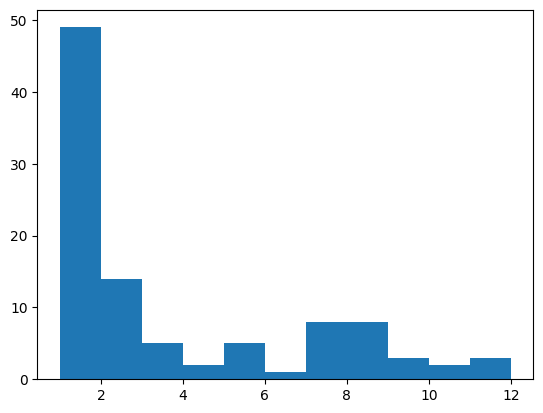

In [ ]:
import pandas as pd


draft_ranks = []
for draft in drafts:
    # Calculate the mean and sort
    d = draft.groupby('mgr').agg({'fp_mean': 'mean'}).sort_values(by='fp_mean', ascending=True)
    
    # Assign the rank to a new column
    d['rank'] = d['fp_mean'].rank(ascending=False)
    
    # Append the DataFrame to the list
    draft_ranks.append(d)
    
# Concatenate all the DataFrames in the list
draft_ranks = pd.concat(draft_ranks)

# Display the final concatenated DataFrame
draft_ranks

rank_hist = draft_ranks.loc[draft_ranks.index == 1].groupby('rank').size()
df_rank_hist = pd.DataFrame(
    {"rank": rank_hist,
     "pr": rank_hist / rank_hist.sum()}
)
print(df_rank_hist)
# make a histogram of ranks for manager 1
plt.hist(draft_ranks.loc[draft_ranks.index == 1]['rank'], bins=range(1, 13))
plt.show()

In [ ]:
scalar = 389.0108028723334
df_drafts.loc[df_drafts['mgr'] == 1]['fp_mean'].mean() * scalar
df_drafts.loc[df_drafts['mgr'] == 1]['fp_mean'].mean()


0.5267010658091709

In [ ]:
env.get_team(1)

,round,mgr,sleeper_id,full_name,team,position,team_pos,fp_mean,fp_std,draft_num
1,0,1,4034,Christian McCaffrey,SF,RB,RB,0.859232,129.226743,199
22,1,1,9509,Bijan Robinson,ATL,RB,RB,0.729264,111.578985,199
25,2,1,9493,Puka Nacua,LAR,WR,WR,0.649873,101.888693,199
46,3,1,BAL,Baltimore Ravens,BAL,DEF,DEF,0.407004,92.608721,199
49,4,1,1466,Travis Kelce,KC,TE,TE,0.520766,81.468772,199
70,5,1,6803,Brandon Aiyuk,SF,WR,WR,0.537729,86.472367,199
73,6,1,2309,Amari Cooper,CLE,WR,FLEX,0.525232,84.357731,199
94,7,1,7588,Javonte Williams,DEN,RB,FLEX,0.448082,69.013466,199
97,8,1,6770,Joe Burrow,CIN,QB,QB,0.846277,131.563582,199
118,9,1,6804,Jordan Love,GB,QB,QB,0.83324,133.047105,199


In [ ]:
i = 12
drafts[i].loc[drafts[i]['mgr'] == 1]

,round,mgr,sleeper_id,full_name,team,position,team_pos,fp_mean,fp_std
1,0,1,4034,Christian McCaffrey,SF,RB,RB,0.859232,129.226743
22,1,1,7564,Ja'Marr Chase,CIN,WR,WR,0.692588,111.626329
25,2,1,8150,Kyren Williams,LAR,RB,RB,0.616877,92.795084
46,3,1,1466,Travis Kelce,KC,TE,TE,0.520766,81.468772
49,4,1,BAL,Baltimore Ravens,BAL,DEF,DEF,0.407004,92.608721
70,5,1,2216,Mike Evans,TB,WR,WR,0.554722,86.119487
73,6,1,2309,Amari Cooper,CLE,WR,FLEX,0.525232,84.357731
94,7,1,1264,Justin Tucker,BAL,K,K,0.372345,55.99801
97,8,1,5967,Tony Pollard,TEN,RB,FLEX,0.436378,66.130425
118,9,1,6770,Joe Burrow,CIN,QB,QB,0.846277,131.563582


In [ ]:
df_drafts_nop.loc[df_drafts['mgr']!=1].groupby(['position']).agg({'fp_mean': 'mean', 'fp_mean': 'mean'})


,fp_mean
position,
DEF,0.339016
K,0.351188
QB,0.761927
RB,0.509025
TE,0.416103
WR,0.490795


In [ ]:
df_drafts.loc[df_drafts['mgr']!=1].groupby(['position']).agg({'fp_mean': 'mean', 'fp_mean': 'mean'})

,fp_mean
position,
DEF,0.338731
K,0.35203
QB,0.764961
RB,0.510628
TE,0.418782
WR,0.489914


In [ ]:
env.draft = drafts[8]
print("num incomplete weeks:", env.get_num_incomplete_team_weeks(1))

print("bye weeks:", env.draft.loc[env.draft['mgr'] == 1].merge(env.bye_weeks, on='team')['bye'].unique())

print(env.get_team_comp(1, flex=False))
# env.draft.loc[env.draft['mgr'] == 1].merge(env.bye_weeks, on='team')
display(env.get_team(1, bye=True).sort_values(by='bye'))

num incomplete weeks: 2
bye weeks: [ 9 14 12 10  6 11]
{'DEF': 1, 'K': 1, 'QB': 2, 'RB': 4, 'TE': 2, 'WR': 5}


,round,mgr,sleeper_id,full_name,team,position,team_pos,fp_mean,fp_std,draft_num,bye
10,10,1,2749,Raheem Mostert,MIA,RB,FLEX,0.438175,23.864084,8,6.0
0,0,1,4034,Christian McCaffrey,SF,RB,RB,0.848701,23.878089,8,9.0
5,5,1,6803,Brandon Aiyuk,SF,WR,WR,0.534292,31.561552,8,9.0
9,9,1,10222,Jayden Reed,GB,WR,FLEX,0.457452,32.530043,8,10.0
11,11,1,4892,Baker Mayfield,TB,QB,QB,0.730786,30.821675,8,11.0
14,14,1,7594,Chuba Hubbard,CAR,RB,FLEX,0.314579,23.656915,8,11.0
3,3,1,8144,Chris Olave,NO,WR,WR,0.564816,32.063362,8,12.0
12,12,1,4666,Younghoe Koo,ATL,K,K,0.351624,19.688783,8,12.0
1,1,1,6813,Jonathan Taylor,IND,RB,RB,0.643591,13.166438,8,14.0
4,4,1,5012,Mark Andrews,BAL,TE,TE,0.468978,24.177562,8,14.0


In [ ]:
drafts[0]

,round,mgr,sleeper_id,full_name,team,position,team_pos,fp_mean,fp_std,draft_num
0,0,0,6904,Jalen Hurts,PHI,QB,QB,0.977959,45.742293,0
1,0,1,4034,Christian McCaffrey,SF,RB,RB,0.848701,23.878089,0
2,0,2,9758,C.J. Stroud,HOU,QB,QB,0.846303,36.109458,0
3,0,3,9229,Anthony Richardson,IND,QB,QB,0.852576,39.811806,0
4,0,4,4881,Lamar Jackson,BAL,QB,QB,0.913975,36.582087,0
5,0,5,4984,Josh Allen,BUF,QB,QB,1.0,53.158937,0
6,0,6,4046,Patrick Mahomes,KC,QB,QB,0.921268,40.868669,0
7,0,7,6770,Joe Burrow,CIN,QB,QB,0.844205,39.624889,0
8,0,8,11560,Caleb Williams,CHI,QB,QB,0.785389,38.105545,0
9,0,9,5849,Kyler Murray,ARI,QB,QB,0.82313,34.550848,0


# Observe training drafts

In [ ]:
import json
import pandas as pd
from pandas import json_normalize
from rl_env_sarl import SARLDraftEnv
import matplotlib.pyplot as plt

# fpath = "logs/DQN_lr_0.0003_gamma_0.99_20240826-200734/draft_history_20240826-200734.json"
fpath = "logs/PPO_20240827-124619/draft_history_20240827-124619.json"
draft_history = json.load(open(fpath, 'r'))

len(draft_history)

# # Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(draft_history[-1])

# df.loc[df['mgr'] == 1, :]
# # # df.shape

# # # len(draft_history)
# sum_fp = df.groupby('mgr')['fp_mean'].sum()
# sum_fp.sort_values(ascending=False)

# set max rows
pd.set_option('display.max_rows', None)

env = SARLDraftEnv(.5)
env.draft = df
print(env.get_mgr_rankings(starters=True))
env.draft.loc[env.draft['mgr'] == 1, :]




    rank  mgr   fp_mean
0      1    9  5.800135
1      2    1  5.531738
2      3    6  5.516408
3      4    3  5.512044
4      5    2  5.503560
5      6    5  5.324988
6      7    0  5.314222
7      8    7  5.284751
8      9   10  5.223354
9     10    4  5.210471
10    11   11  5.192885
11    12    8  5.144438


,round,mgr,sleeper_id,full_name,team,position,team_pos,fp_mean,fp_std
1,0,1,8155,Breece Hall,NYJ,RB,RB,0.714236,25.676804
22,1,1,9221,Jahmyr Gibbs,DET,RB,RB,0.616887,24.997244
25,2,1,5859,A.J. Brown,PHI,WR,WR,0.647313,33.206802
46,3,1,1466,Travis Kelce,KC,TE,TE,0.516778,26.221593
49,4,1,11533,Brandon Aubrey,DAL,K,K,0.375178,4.589032
70,5,1,NYJ,New York Jets,NYJ,DEF,DEF,0.410554,45.058410
73,6,1,2309,Amari Cooper,CLE,WR,WR,0.529283,34.504147
94,7,1,8183,Brock Purdy,SF,QB,QB,0.808508,38.308314
97,8,1,6130,Devin Singletary,NYG,RB,FLEX,0.450854,32.788531
118,9,1,5937,Diontae Johnson,CAR,WR,FLEX,0.462147,26.791538


# Sleeper draft

In [ ]:
# from rl_env import DraftEnv

# env = DraftEnv(stochastic_temp=1)

pos_dict = {0: "QB", 1: "RB", 2: "WR", 3: "TE", 4: "K", 5: "DEF"}

# model_path = "logs/PPO_20240827-124619/best_model.zip"  # Also a good model
model_path = "logs/PPO_20240827-143658/best_model.zip"
best_model = PPO.load(model_path, env=env)

best_model.policy.eval()

rl_mgr = 1
# state, _ = env.reset()
with torch.no_grad():
    env.open_players = env.open_players.loc[~env.open_players['sleeper_id'].isin(env.draft['sleeper_id'])]
    state = env.update_state()
    action, _states = best_model.predict(state, deterministic=True)

p = env.open_players.loc[env.open_players['position'] == pos_dict[action.item()]].iloc[0]
print(p['full_name'], p['sleeper_id'])
# env.draft
    


Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Adam Thielen 1689


In [ ]:
import requests
import json
from rl_env import DraftEnv, STARTER_COMPOSITION

env = DraftEnv(stochastic_temp=.5)

url = f"https://api.sleeper.app/v1/draft/1134294799990943744/picks"
resp = requests.get(url).json()
print(f"Number of picks: {len(resp)}")

for pick in resp:
    # print(pick)
    
    if pick['metadata']['player_id'] not in env.all_players['sleeper_id'].values:
        print(f"Player {pick['metadata']['player_id']}, {pick['metadata']['first_name']}, {pick['metadata']['last_name']} not in all_players")
        continue
    mgr_num = int(pick['draft_slot']) - 1
    turn_num = int(pick['pick_no']) - 1
    d_round = int(pick['round'])
    sleeper_id = pick['metadata']['player_id']
    full_name = pick['metadata']['first_name'] + " " + pick['metadata']['last_name']
    fp_mean = env.all_players.loc[env.all_players['sleeper_id'] == sleeper_id, 'mean'].values[0]
    fp_std = env.all_players.loc[env.all_players['sleeper_id'] == sleeper_id, 'std'].values[0]
    team = env.all_players.loc[env.all_players['sleeper_id'] == sleeper_id, 'team'].values[0]
    position = env.all_players.loc[env.all_players['sleeper_id'] == sleeper_id, 'position'].values[0]
    
    if position not in ["RB", "WR", "TE"]:
        team_pos = position
    else:
        needed_pos = env.get_needed_pos_counts(mgr_num, flex=True)
        if needed_pos[position] > 0:
            team_pos = position
        else:
            team_pos = "FLEX"
    
    env.draft.iloc[turn_num] = {
    # env.draft.loc[(env.draft['round']==d_round) and (env.draft['mgr'] == mgr_num)] = {
        'mgr': mgr_num,
        'sleeper_id': sleeper_id,
        'full_name': full_name,
        'fp_mean': fp_mean,
        'fp_std': fp_std,
        'team': team,
        'position': position,
        'team_pos': team_pos,
        'round': d_round
    }

    
    # env.draft.iloc[turn_num] = [mgr_num, sleeper_id, full_name]
# env.draft.groupby('mgr').agg({'fp_mean': 'sum'}).sort_values(by='fp_mean', ascending=False)
env.get_mgr_rankings(starters=True)

# def update_draft(env, draft_id)


Number of picks: 180
Player 5848, Hollywood, Brown not in all_players


,rank,mgr,fp_mean
0,1,0,5.444533
1,2,11,5.387487
2,3,6,5.386279
3,4,2,5.358019
4,5,8,5.291292
5,6,1,5.289034
6,7,4,5.213075
7,8,10,5.200297
8,9,3,5.160072
9,10,7,5.142877


/var/folders/st/_8t9rcwd49jf2y161kkqlch40000gn/T/ipykernel_27482/4259836939.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['in_draft'] = df['full_name'].isin(env.draft['full_name'])


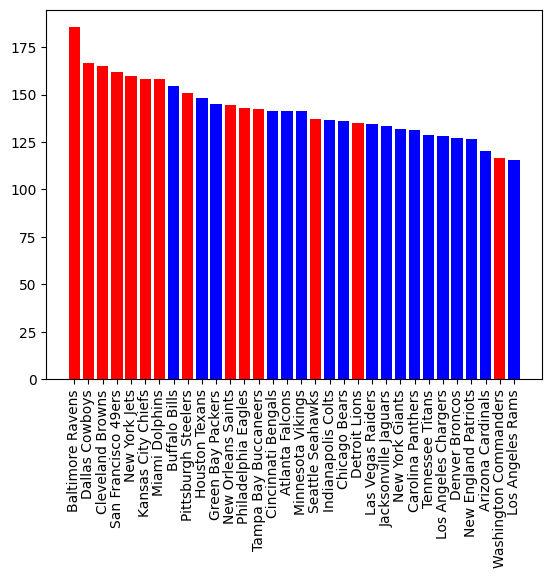

In [ ]:
# make a barplot of fp_mean for defense and order the bars by fp_mean
import matplotlib.pyplot as plt

scalar = 389.0108028723334
df = env.all_players.loc[env.all_players['position'] == 'DEF']
# df = df.groupby('full_name')['fp_mean'].mean().reset_index()

# color the bars a different color if full_name is in env.draft['full_name']

df.loc[:, 'mean'] *= scalar
df['in_draft'] = df['full_name'].isin(env.draft['full_name'])
plt.bar(df['full_name'], df['mean'])
plt.bar(df['full_name'], df['mean'], color=df['in_draft'].map({True: 'r', False: 'b'}))
plt.xticks(rotation=90)
plt.show()

# Tensorboard

In [ ]:
# Install TensorBoard if it's not already installed


# Import TensorBoard and the necessary library to run it in a notebook
import os
import tensorflow as tf
from tensorboard import notebook

# Path to the log directory used during training
log_dir = "./logs/"

# Launch TensorBoard and visualize the results
# This will start TensorBoard and make it accessible within the notebook
%load_ext tensorboard

# Display TensorBoard in the notebook
%tensorboard --logdir {log_dir} --port=6006

/Users/ashish/files/fun_projects/fantasy_football_2024/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [ ]:
x = df_sleeper['team'].unique()
for i in x:
    print(i)

nan
TB
DAL
PIT
JAX
MIA
CHI
PHI
CLE
SF
NYG
NE
DEN
LAR
BAL
MIN
ATL
IND
CAR
LAC
WAS
HOU
LV
BUF
KC
NYJ
CIN
GB
ARI
DET
SEA
TEN
NO


In [ ]:
import json
import pandas as pd
# fpath = "logs/lr_0.001_gamma_0.99_20240826-133826/draft_episode_1000_20240826-133826.json"
# fpath = "logs/lr_0.001_gamma_0.99_20240826-165156/draft_episode_50_20240826-165156.json"
fpath = "logs/lr_0.001_gamma_0.99_20240826-172804/draft_episode_50_20240826-172804.json"
draft_data = json.load(open(fpath, 'r'))
draft = pd.DataFrame(draft_data)
draft

,round,mgr,sleeper_id,full_name,team,position,team_pos,fp_mean,fp_std
0,0,0,4046,Patrick Mahomes,KC,QB,QB,0.927424,40.843103
1,0,1,None,None,None,None,None,NaN,NaN
2,0,2,None,None,None,None,None,NaN,NaN
3,0,3,None,None,None,None,None,NaN,NaN
4,0,4,None,None,None,None,None,NaN,NaN
5,0,5,None,None,None,None,None,NaN,NaN
6,0,6,None,None,None,None,None,NaN,NaN
7,0,7,None,None,None,None,None,NaN,NaN
8,0,8,None,None,None,None,None,NaN,NaN
9,0,9,None,None,None,None,None,NaN,NaN


In [ ]:
import torch
model_path = "logs/lr_0.001_gamma_0.99_20240826-133826/rl_model_60000_steps.zip"




In [ ]:
turns = []
'''first two rounds snake, third round jumps back to last manager and snakes from there'''
for i in range(12):
    turns.append({"round": 0, "mgr": i})
for i in range(11, -1, -1):
    turns.append({"round": 1, "mgr": i})
    
for round_num in range(2, 15):
    if round_num % 2 == 0:
        for i in range(11, -1, -1):
            turns.append({"round": round_num, "mgr": i})
    else:  
        for i in range(12):
            turns.append({"round": round_num, "mgr": i})
            
for turn in turns:
    print(turn)

{'round': 0, 'mgr': 0}
{'round': 0, 'mgr': 1}
{'round': 0, 'mgr': 2}
{'round': 0, 'mgr': 3}
{'round': 0, 'mgr': 4}
{'round': 0, 'mgr': 5}
{'round': 0, 'mgr': 6}
{'round': 0, 'mgr': 7}
{'round': 0, 'mgr': 8}
{'round': 0, 'mgr': 9}
{'round': 0, 'mgr': 10}
{'round': 0, 'mgr': 11}
{'round': 1, 'mgr': 11}
{'round': 1, 'mgr': 10}
{'round': 1, 'mgr': 9}
{'round': 1, 'mgr': 8}
{'round': 1, 'mgr': 7}
{'round': 1, 'mgr': 6}
{'round': 1, 'mgr': 5}
{'round': 1, 'mgr': 4}
{'round': 1, 'mgr': 3}
{'round': 1, 'mgr': 2}
{'round': 1, 'mgr': 1}
{'round': 1, 'mgr': 0}
{'round': 2, 'mgr': 11}
{'round': 2, 'mgr': 10}
{'round': 2, 'mgr': 9}
{'round': 2, 'mgr': 8}
{'round': 2, 'mgr': 7}
{'round': 2, 'mgr': 6}
{'round': 2, 'mgr': 5}
{'round': 2, 'mgr': 4}
{'round': 2, 'mgr': 3}
{'round': 2, 'mgr': 2}
{'round': 2, 'mgr': 1}
{'round': 2, 'mgr': 0}
{'round': 3, 'mgr': 0}
{'round': 3, 'mgr': 1}
{'round': 3, 'mgr': 2}
{'round': 3, 'mgr': 3}
{'round': 3, 'mgr': 4}
{'round': 3, 'mgr': 5}
{'round': 3, 'mgr': 6}
{'rou